# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [5]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
total_fruits = 100
p = 60 / total_fruits
q = 40 / total_fruits
print(f"The probability that the fruit is an apple is {p} and an orange {q}.")

The probability that the fruit is an apple is 0.6 and an orange 0.4.


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

The probability is still the same, as there is replacement.

The probability of getting 5 apples in a row is:

In [7]:
round(p ** 5, 3)

0.078

The probability of getting 5 apples and then 15 oranges, in that order, is:

In [14]:
round((p ** 5) * (q ** 15), 10)

8.35e-08

I can't round it to 3 decimals in this case :P

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [29]:
from scipy.stats import binom
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
N = 20
fruitbasket = binom (N, p)

<AxesSubplot:ylabel='count'>

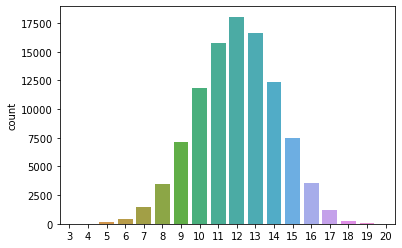

In [21]:
sample = fruitbasket.rvs(size = 100000)
sns.countplot(x = sample)

The probability to get only 5 apples is very small, there is a 60% of apples in the basket, in the graph we can see that the most probable scenario is to get 12 apples. The probability to get 5 apples is:

In [24]:
round(fruitbasket.pmf(5), 4)

0.0013

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [25]:
round(fruitbasket.cdf(5), 4)

0.0016

It is not possible to round to 3, otherwise we can't see any difference...

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

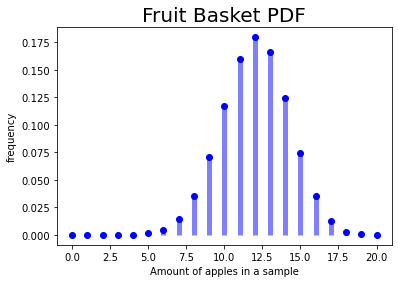

In [39]:
x = np.arange(0,21)
fig, ax = plt.subplots(1, 1)
ax.plot(x, fruitbasket.pmf(x), 'bo')
ax.vlines(x, 0, fruitbasket.pmf(x), colors='b', lw=5, alpha=0.5)

plt.title('Fruit Basket PDF', size=20)
plt.xlabel('Amount of apples in a sample')
plt.ylabel('frequency')
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [40]:
import math

As I need to calculate it with math tools, I create a function to do do it quick:

In [69]:
avgoals = 2.3
goals_match = 5
def poisson_yo (lambd, k):
    return ((lambd**k)*(math.exp(-lambd)))/(math.factorial(k))

The probability of 5 goals is:

In [64]:
round(poisson_yo(avgoals, goals_match), 3)

0.054

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [71]:
probability = [poisson_yo(avgoals, goals) for goals in range (11)]
probability

[0.10025884372280375,
 0.2305953405624486,
 0.2651846416468159,
 0.20330822526255884,
 0.1169022295259713,
 0.0537750255819468,
 0.02061375980641294,
 0.006773092507821395,
 0.0019472640959986504,
 0.0004976341578663217,
 0.00011445585630925399]

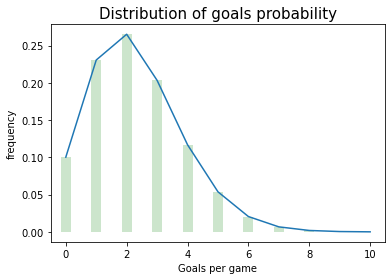

In [91]:
x = np.arange(0,11)
fig, ax = plt.subplots(1, 1)
ax.plot(x, probability)
ax.vlines(x, 0, probability, colors='g', lw=10, alpha=0.2)

plt.title('Distribution of goals probability', size=15)
plt.xlabel('Goals per game')
plt.ylabel('frequency')
plt.show()

This is the probability distribution of goals per game